# Feature Engineering

#### Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [6]:
# Load the dataset and explore head info
data_frame = pd.read_csv('../data/BostonHousing.csv')

### Feature Engineering: Adding New Features

#### Adding following new features in dataset to enhance the predictive power of the model:
- Interaction Term
- Polynomial Term

In [9]:
# Add new features
data_frame['rm_lstat'] = data_frame['rm'] * data_frame['lstat']  # Interaction term
data_frame['rm_sq'] = data_frame['rm'] ** 2  # Polynomial term

### Data Preprocessing with New Features
- Standardized the features using `StandardScaler`.
- Split the dataset into training and testing sets using `train_test_split`.


In [12]:
# Preprocessing new features
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data_frame.drop(columns='medv')
y = data_frame['medv']

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Train new model with new features

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### Make Prediction and Evaluate the model on the test dataset 

In [18]:
# Make predictions
y_pred = model.predict(X_test)


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f"R-squared with new features: {r2:.2f}")

Mean Absolute Error: 2.3497247127343415
Mean Squared Error: 13.68702013675693
R-squared with new features: 0.81


### Comparing actual vs predicted model

#### Load the original model and evaluate it

In [21]:
# Load the original model
original_model = joblib.load('../models/linear_regression_model.pkl')
X_test_original_features = X_test.drop(columns=['rm_lstat', 'rm_sq'])

# Predict and calculate R-squared for the original model
original_y_pred = original_model.predict(X_test_original_features)
original_r2 = r2_score(y_test, original_y_pred)

# Print the R-squared value for the original model
print(f"Original R-squared (without new features): {original_r2:.2f}")

Original R-squared (without new features): 0.67


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


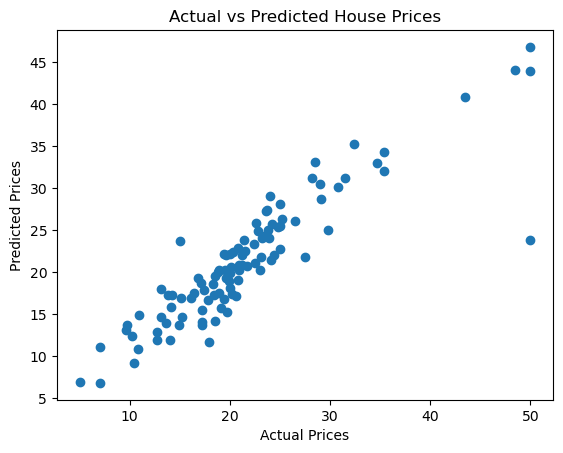

In [25]:
## Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

### Check and Handle Multicollinearity

In [28]:
# Check for multicollinearity by calculating the VIF and handling it:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant to features to calculate VIF
X_train_const = add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

#vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i+1) for i in range(X_train_const.shape[1])]
# Unable to solve Index issue in above line so commented as of now.
print(vif_data)

     Feature
0       crim
1         zn
2      indus
3       chas
4        nox
5         rm
6        age
7        dis
8        rad
9        tax
10   ptratio
11         b
12     lstat
13  rm_lstat
14     rm_sq
